In [1]:
import sys
import rootpath
sys.path.append(rootpath.detect())

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import wfg
from testsuite.utilities import Pareto_split
from experiments.igd_refpoints.igd_utilities import *
from scipy.spatial import distance_matrix

In [2]:
a, b, c, d = 2, 4, 6, 8

In [3]:
try:
    with open('data/wfg_elipse_2d_refpoints', 'rb') as infile:
        yf_2 = np.load(infile)
    yf_2_loaded = True
    print("2D data: loaded")
except:
    yf_2_loaded = False
    print("2D data: not found")

2D data: loaded


In [4]:
y = abs(np.random.multivariate_normal([0., 0.], np.diag([a**2, b**2]), size=100000))
y = normalise_to_axes(y, [a, b])

if not yf_2_loaded:
    yf_2 = attainment_sample(y, 5000)

In [5]:
yf_2.shape

(5000, 2)

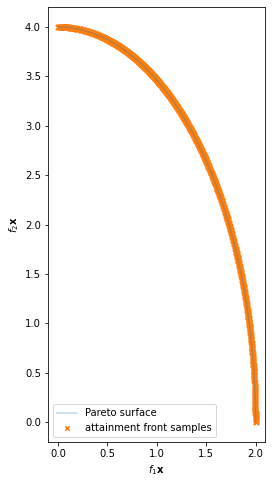

In [6]:
fig = plt.figure(figsize=[8, 8])
ax = fig.gca()
ax.plot(*y[np.argsort(y[:,0])].T, c="C0", alpha=0.3, label="Pareto surface")
ax.scatter(*yf_2.T, s=20, c="C1", marker="x", label="attainment front samples")
ax.set_xlabel(r"$f_1\mathbf{x}$")
ax.set_ylabel(r"$f_2\mathbf{x}$")
ax.set_aspect('equal')
ax.legend()

In [7]:
if not yf_2_loaded:
    with open('data/wfg_elipse_2d_refpoints', 'wb') as outfile:
        np.save(outfile, yf_2)
        print("new datapoints saved to {}".format(outfile.name))

In [3]:
try:
    with open('data/wfg_elipse_3d_refpoints', 'rb') as infile:
        yf_3 = np.load(infile)
    yf_3_loaded = True
    print("3D data: loaded")
except FileNotFoundError:
    yf_3_loaded = False
    print("3D data: not found")

3D data: loaded


In [4]:
yf_3_loaded = False

In [5]:
y = abs(np.random.multivariate_normal([0., 0., 0.], np.diag([a**2, b**2, c**2]), size=100000))
y = normalise_to_axes(y, [a, b, c])

In [ ]:
if not yf_3_loaded:
    print("Ping")
    ya = attainment_sample(y, 15000)
    D = distance_matrix(y, ya)
    min_D0 = D.min(axis=0)
    min_D1 = D.min(axis=1)
        
    # plot threshold effects
    thresh_plot_0 = [sum(min_D0<i) for i in np.linspace(0.01, 0.5, 200)]
    thresh_plot_1 = [sum(min_D1<i) for i in np.linspace(0.01, 0.5, 200)]
        
    thresh = 0.05
          
    fig = plt.figure(figsize=[17, 8])
    ax0 = fig.add_subplot(121)
    ax1 = fig.add_subplot(122, projection='3d')
    
    yf_3 = ya[min_D0<thresh]
    yf_3 = normalise_to_axes(yf_3, [a, b, c])
    
    ax0.plot(np.linspace(0.01, 0.5, 200), np.array(thresh_plot_0)/len(min_D0), label="Pareto surface points")
    ax0.plot(np.linspace(0.01, 0.5, 200), np.array(thresh_plot_1)/len(min_D1), label="Attainment surface points")
    ax0.axvline(thresh, linestyle="--", c="r", label=r"~$100\%$ Pareto points within threshold")
    ax0.set_xlabel("Threshhold distance")
    ax0.set_ylabel("n below threshold/n totaal")
    ax0.set_xlim([0, 0.5])
    ax0.set_ylim([0, 1.1])
    ax0.legend()
    
    ax_format(ax1, axes=[2., 4., 6.], vp=[35, 15])
    ax1.scatter(*ya[min_D0<thresh].T, s=2, c="C0", label="nn distance<threshold")
    ax1.scatter(*ya[min_D0>thresh].T, s=2, c="C1", label="nn distance>threshold")
    ax1.legend()

  0%|          | 0/15000 [00:00<?, ?it/s]

Ping


 50%|████▉     | 7474/15000 [13:13<24:33,  5.11it/s]  

No handles with labels found to put in legend.


[2, 4, 6]
3d


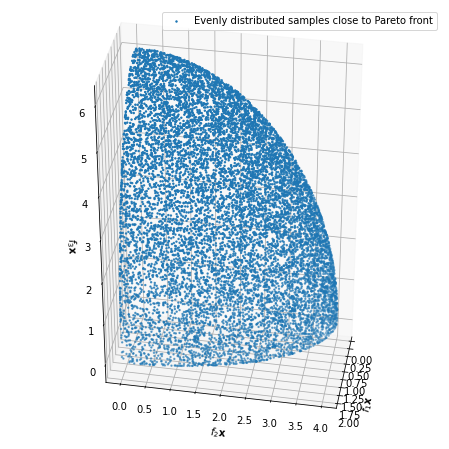

In [11]:
fig = plt.figure(figsize=[8, 8])
ax = fig.gca(projection="3d")
ax_format(ax, axes=[2, 4, 6], vp=[35, 10])
ax.scatter(*yf_3.T, s=2, c="C0", label="Evenly distributed samples close to Pareto front")
ax.legend()

In [12]:
if not yf_3_loaded: 
    with open('data/wfg_elipse_3d_refpoints', 'wb') as outfile:
        np.save(outfile, yf_3)
    print("Data saved")

Data saved


In [17]:
del(D)
import gc
gc.collect()

20

In [3]:
try:
    with open('data/wfg_elipse_4d_refpoints', 'rb') as infile:
        yf_4 = np.load(infile)
    yf_4_loaded = True
    print("4D data: loaded")
except FileNotFoundError:
    yf_4_loaded = False
    print("4D data: not found")

4D data: loaded


In [4]:
yf_4_loaded = False

In [23]:
from scipy.spatial import KDTree

In [ ]:
tree0 = KDTree(y_at)

In [ ]:
aa0 = tree0.query(y) 

In [9]:
y = abs(np.random.multivariate_normal([0., 0., 0., 0.], np.diag([a**2, b**2, c**2, d**2]), 100000))
y = normalise_to_axes(y, [a, b, c, d])
a, b, c, d = np.round(y.max(axis=0), 1)

In [10]:

if not yf_4_loaded:
    ya = attainment_sample(y, 50000)
        
#     D = distance_matrix(y, ya)
#     min_D0 = D.min(axis=0)
#     min_D1 = D.min(axis=1)
        
#     # plot threshold effects
#     thresh_plot_0 = [sum(min_D0<i) for i in np.linspace(0.01, 0.5, 200)]
#     thresh_plot_1 = [sum(min_D1<i) for i in np.linspace(0.01, 0.5, 200)]
        
#     thresh = 0.17
          
#     fig = plt.figure(figsize=[17, 8])
#     ax0 = fig.add_subplot(121)
#     ax1 = fig.add_subplot(122, projection='3d')
    
#     yf_4 = ya[min_D0<thresh]
#     yf_4 = normalise_to_axes(yf_4, [a, b, c, d])
    
#     ax0.plot(np.linspace(0.01, 0.5, 200), np.array(thresh_plot_0)/len(min_D0), label="Pareto surface points")
#     ax0.plot(np.linspace(0.01, 0.5, 200), np.array(thresh_plot_1)/len(min_D1), label="Attainment surface points")
#     ax0.axvline(thresh, linestyle="--", c="r", label=r"~$100\%$ Pareto points within threshold")
#     ax0.set_xlabel("Threshhold distance")
#     ax0.set_ylabel("n below threshold/n totaal")
#     ax0.set_xlim([0, 0.5])
#     ax0.set_ylim([0, 1.1])
#     ax0.legend()
    
#     ax_format(ax1, axes=[2., 4., 6.], vp=[35, 15])
#     ax1.scatter(*ya[min_D0<thresh].T, s=2, c="C0", label="nn distance<threshold")
#     ax1.scatter(*ya[min_D0>thresh].T, s=2, c="C1", label="nn distance>threshold")
#     ax1.legend()
 

  0%|          | 45/50000 [00:05<1:49:11,  7.63it/s]


KeyboardInterrupt: 

In [20]:
y.shape

(500000, 4)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


[2.0, 4.0, 6.0]
3d
[4.0, 6.0, 8.0]
3d
[2.0, 6.0, 8.0]
3d
[2.0, 4.0, 6.0]
3d
[4.0, 6.0, 8.0]
3d
[2.0, 6.0, 8.0]
3d


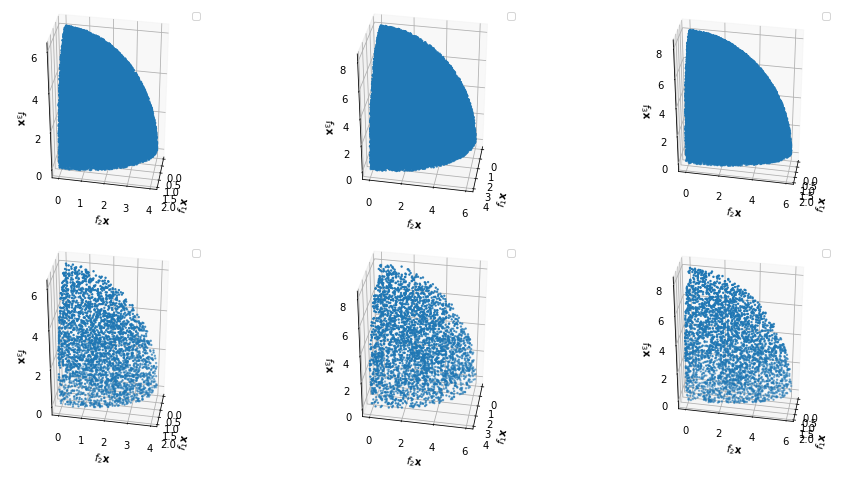

In [13]:
fig = plt.figure(figsize=[16, 8])
ax0 = fig.add_subplot(2,3,1, projection="3d")
ax1 = fig.add_subplot(2,3,2, projection="3d")
ax2 = fig.add_subplot(2,3,3, projection="3d")
ax3 = fig.add_subplot(2,3,4, projection="3d")
ax4 = fig.add_subplot(2,3,5, projection="3d")
ax5 = fig.add_subplot(2,3,6, projection="3d")

ax_format(ax0, axes=[a, b, c], vp=[35, 10]);
ax_format(ax1, axes=[b, c, d], vp=[35, 10]);
ax_format(ax2, axes=[a, c, d], vp=[35, 10]);
ax_format(ax3, axes=[a, b, c], vp=[35, 10]);
ax_format(ax4, axes=[b, c, d], vp=[35, 10]);
ax_format(ax5, axes=[a, c, d], vp=[35, 10]);

ax0.scatter(*y[:, :3].T, s=2, c="C0", label="Evenly distributed samples close to Pareto front")
ax1.scatter(*y[:,1:4].T, s=2, c="C0", label="Evenly distributed samples close to Pareto front")
ax2.scatter(*y[:,[0,2,3]].T, s=2, c="C0", label="Evenly distributed samples close to Pareto front")

ax3.scatter(*yf_4[:, :3].T, s=2, c="C0", label="Evenly distributed samples close to Pareto front")
ax4.scatter(*yf_4[:,1:4].T, s=2, c="C0", label="Evenly distributed samples close to Pareto front")
ax5.scatter(*yf_4[:,[0,2,3]].T, s=2, c="C0", label="Evenly distributed samples close to Pareto front")

In [14]:
if  not yf_4_loaded:
    with open('data/wfg_elipse_4d_refpoints', 'wb') as outfile:
        np.save(outfile, y_4f)

In [15]:
print(yf_2_loaded)
print(yf_3_loaded)
print(yf_4_loaded)

True
True
True
